# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [20]:
# !pip install numpy
# !pip install matplotlib
# !pip install cvxpy
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

### Subsection 1

In [81]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

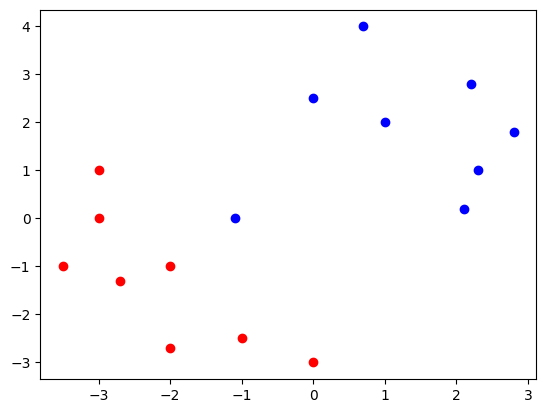

In [82]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

## Derivation

Distance of any point $x_i$ from the line $w^Tx+b=0$ is $\left|\frac{w^Tx_i+b}{||w||}\right|$.

There are two approaches we can take to maximize the margin :-
1. Either set the value of $||w||$ to 1 and maximize $\sum_i |w^Tx_i+b|$ 
2. Set the value of margin to be 1, and maximize value of $\frac{1}{||w||}$, which is equivalent of minimizing $\frac{1}{2} w^T w$

We take the second approach and minimize the value of $\frac{1}{2} w^T w$.

Let the $x_{pos}$ be a positive class sample and $x_{neg}$ be a negative class sample which are the support vectors.
The equations of two lines will be $w^Tx_{pos} + b = 1$ and $w^Tx_{neg} + b = -1$ , subtracting these two equation we get :- 

Then the distance between these two points = $ \frac{2}{||w||}$.
To minimize the distance we need to maximize $||w||$.

The constraints thus for the given objective, with the hard margin, will be to have all the points satisfying $y_i (w^T x_i +b) \ge 1 \, \forall i$, where $y_i$ is the actual class of the point $x_i$.


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [83]:
# Write your code here
w = cp.Variable(2)
b = cp.Variable(1)
constraints = [y[i] * (X[i]@w + b) >= 1 for i in range(X.shape[0])]
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2))), constraints)
problem.solve()

2.3629489603024565

In [84]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    plt.gca().set_aspect('equal', adjustable='box')
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

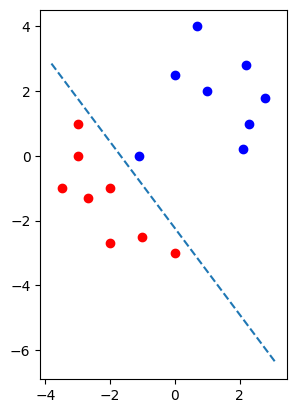

In [85]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
plt.show()

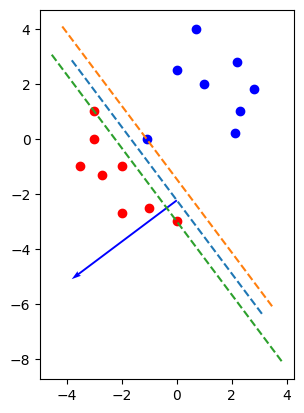

In [86]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
V = np.array([[w.value[0]*5,w.value[1]*5]])
origin = np.array([[0],[-b.value[0]/w.value[1]]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['b'], scale=21)
plt.show()

In [87]:
support_vectors = ((X@w.value + b.value > 1.0 - 1e-9) & (X@w.value + b.value < 1.0 + 1e-9)) | ((X@w.value + b.value > -1.0 - 1e-9) & (X@w.value + b.value < -1.0 + 1e-9))
support_vectors

array([False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False])

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

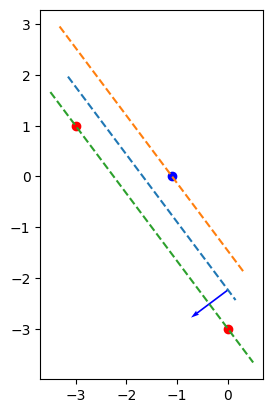

In [88]:
# Write your code here
X_support = X[support_vectors]
y_support = y[support_vectors]
plot_points(X_support, y_support)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
V = np.array([[w.value[0]*2,w.value[1]*2]])
origin = np.array([[0],[-b.value[0]/w.value[1]]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['b'], scale=21)
plt.show()

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [89]:
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1])
print(X.shape)
new_points = np.array([[-4, -10], [4, 4]])
print(new_points.shape)
X = np.vstack((X, new_points))
X.shape

(16, 2)
(2, 2)


(18, 2)

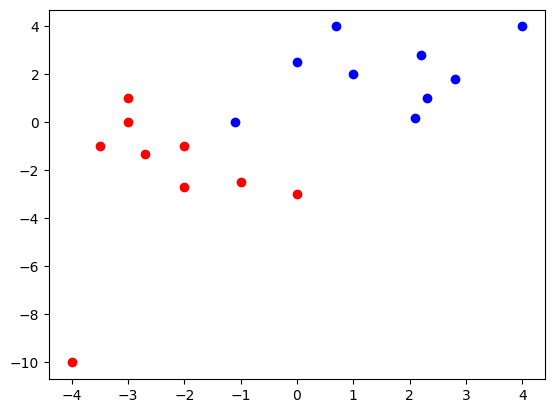

In [90]:
# Re-create the Synthetic Data by adding the points and visualize the points
plot_points(X, y)

In [91]:
# Solve for the decision boundary using this modified dataset
w = cp.Variable(2)
b = cp.Variable(1)
constraints = [y[i] * (X[i]@w + b) >= 1 for i in range(X.shape[0])]
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2))), constraints)
problem.solve()

2.3629489603024587

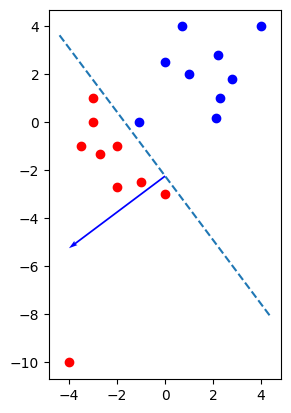

In [94]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
V = np.array([[w.value[0]*5,w.value[1]*5]])
origin = np.array([[0],[-b.value[0]/w.value[1]]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['b'], scale=21)
plt.show()

**Explanation**
The boundary separating two classes does not change because the points we added to the dataset do not become the support vectors. This means that the boundary (separating line) only depends on the support vectors.

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

**Modified formulation**
minimize the value of $\frac{1}{2} w^T w + C \sum_{i=1}^{n}(err_i) $.

The constraints thus for the given objective, with the hard margin, will be to have all the points satisfying $y_i (w^T x_i +b) \ge 1 - err_i \, \forall i$, where $y_i$ is the actual class of the point $x_i$.



In [71]:
# Write your code here for C= 0.01
C = 0.01
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

0.09495328307392996

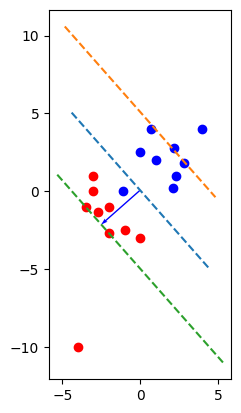

In [73]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
V = np.array([[w.value[0]*20,w.value[1]*20]])
origin = np.array([[0],[-b.value[0]/w.value[1]]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['b'], scale=21)
plt.show()

In [95]:
# Write your code here for C= 0.1
C = 0.1
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

0.30455489224628424

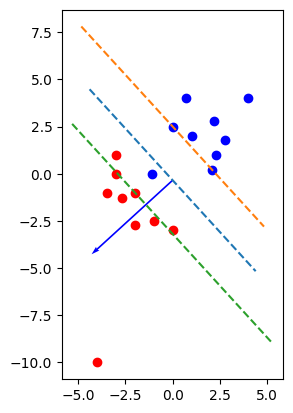

In [96]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
V = np.array([[w.value[0]*20,w.value[1]*20]])
origin = np.array([[0],[-b.value[0]/w.value[1]]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['b'], scale=21)
plt.show()

In [97]:
# Write your code here for C= 3
C = 3
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

2.3629489603024587

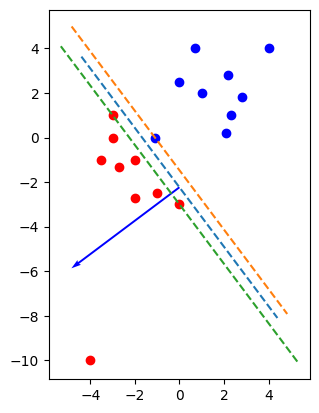

In [100]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
V = np.array([[w.value[0]*5,w.value[1]*5]])
origin = np.array([[0],[-b.value[0]/w.value[1]]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['b'], scale=21)
plt.show()

In [101]:
# Write your code here for C= 10
C = 10
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

2.362948960302459

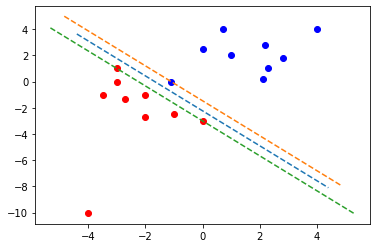

In [64]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])

plt.show()

In [71]:
# Write your code here for C= 100
C = 100
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X.shape[0])
constraints = [y[i] * (X[i]@w + b) >= 1 - err[i] for i in range(X.shape[0])]
non_negative = [err[i] >= 0 for i in range(X.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X.shape[0])@err), constraints)
problem.solve()

2.362948960302459

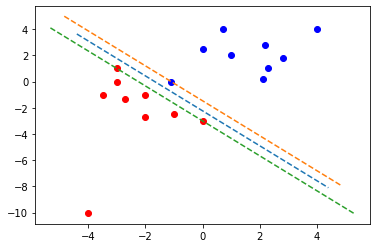

In [78]:
plot_points(X, y)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

In [79]:
# Write your Code here
support_vectors = ((X@w.value + b.value > 1.0 - 1e-9) & (X@w.value + b.value < 1.0 + 1e-9)) | ((X@w.value + b.value > -1.0 - 1e-9) & (X@w.value + b.value < -1.0 + 1e-9))
other_data = np.invert(support_vectors)
print(other_data)
X_new = X[other_data]
y_new = y[other_data]
C = 100
w = cp.Variable(2)
b = cp.Variable(1)
err = cp.Variable(X_new.shape[0])
constraints = [y_new[i] * (X_new[i]@w + b) >= 1 - err[i] for i in range(X_new.shape[0])]
non_negative = [err[i] >= 0 for i in range(X_new.shape[0])]
constraints = constraints + non_negative
problem = cp.Problem(cp.Minimize(0.5 * cp.quad_form(w, np.eye(2)) + C*np.ones(X_new.shape[0])@err), constraints)
problem.solve()

[ True  True False  True  True  True  True False False  True  True  True
  True  True  True  True  True  True]


0.13585196337599129

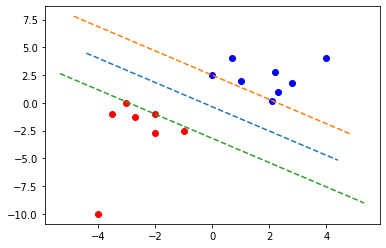

In [80]:
plot_points(X_new, y_new)
abline(-w.value[0]/w.value[1], -b.value/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value+1)/w.value[1])
abline(-w.value[0]/w.value[1], -(b.value-1)/w.value[1])
plt.show()

### Subsection 2

In [ ]:
# !pip install python-mnist
# !rm -rf samples
# !mkdir samples
# !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
# !gunzip samples/train-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/train-labels-idx1-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
# !gunzip samples/t10k-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/t10k-labels-idx1-ubyte.gz

In [4]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,r2_score
import seaborn as sns

In [15]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)
print(images_train.shape)

(60000, 784)
(20000, 784)
(20000,)


In [16]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)
print(images_test.shape)

(1000, 784)
(1000,)


- Tweak different parameters like the C Parameter, gamma parameter and kernel of the SVM class and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [17]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', C = 0.1, kernel='rbf'))
clf.fit(images_train, labels_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, gamma='auto'))])

In [18]:
predicted = clf.predict(images_test)

accuracy : 0.846
f1 score : 0.8471890712070661
r2 score : 0.6810651085104611
AxesSubplot(0.125,0.125;0.62x0.755)


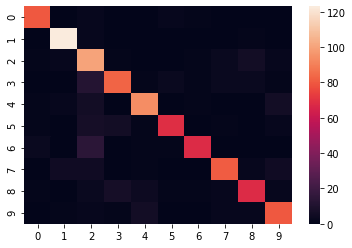

In [9]:
print('accuracy : {a}'.format(a=accuracy_score(labels_test, predicted)))
print('f1 score : {a}'.format(a = f1_score(labels_test, predicted, average='weighted')))
print('r2 score : {a}'.format(a = r2_score(labels_test, predicted)))
print(sns.heatmap(confusion_matrix(labels_test, predicted)))

accuracy : 0.745
f1 score : 0.7731395439118891


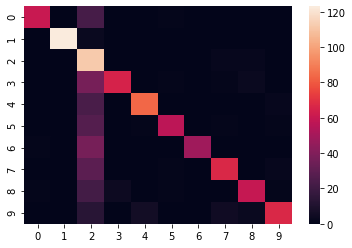

accuracy : 0.927
f1 score : 0.9269087289473923


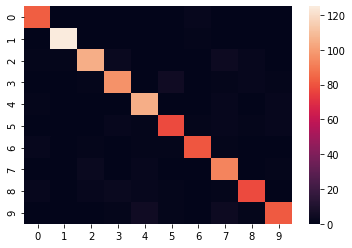

accuracy : 0.915
f1 score : 0.915013407674585


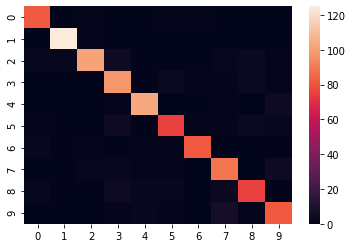

accuracy : 0.901
f1 score : 0.9011026382016275


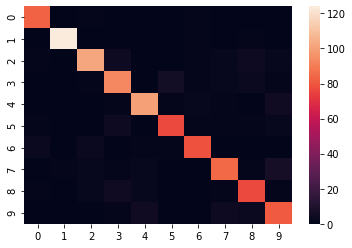

accuracy : 0.745
f1 score : 0.7731395439118891


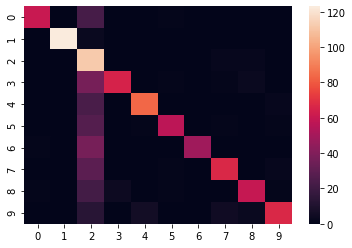

accuracy : 0.927
f1 score : 0.9270785077886928


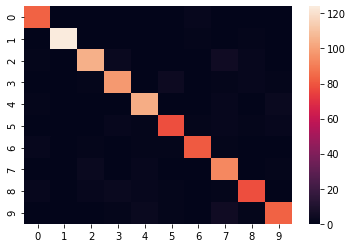

accuracy : 0.907
f1 score : 0.9069194418146008


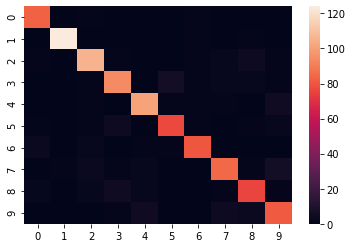

accuracy : 0.881
f1 score : 0.8804143903404037


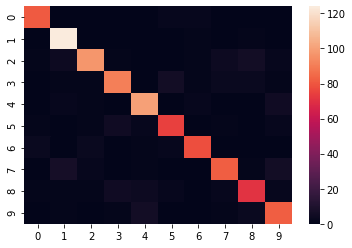

accuracy : 0.329
f1 score : 0.29971881800698386


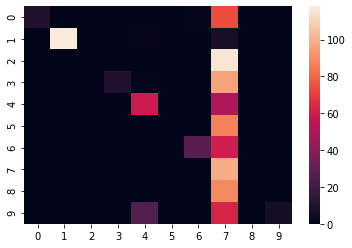

accuracy : 0.85
f1 score : 0.8499408223768798


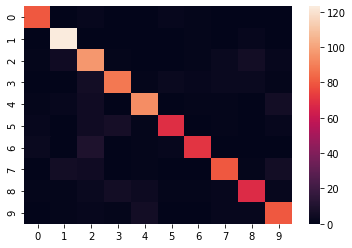

accuracy : 0.622
f1 score : 0.570984151447673


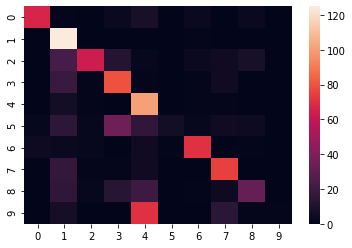

accuracy : 0.126
f1 score : 0.028198934280639434


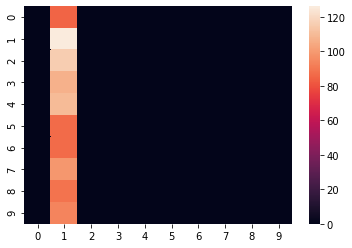

accuracy : 0.202
f1 score : 0.08056213373159526


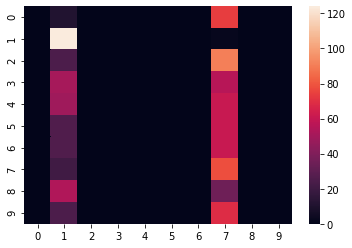

accuracy : 0.299
f1 score : 0.23009763625210464


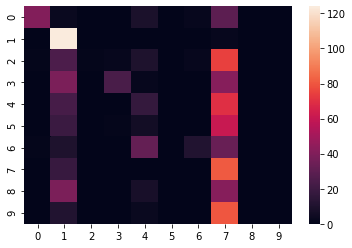

accuracy : 0.126
f1 score : 0.028198934280639434


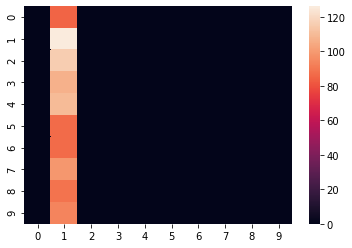

accuracy : 0.126
f1 score : 0.028198934280639434


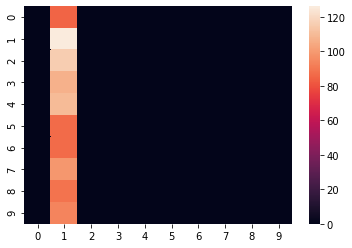

In [44]:
gamma_val = [1e-2, 1e-3, 1e-4, 1e-5]
c_val = [100, 10, 0.1, 0.01]
for c in c_val:
    for g in gamma_val:
        print('C : {a} and gamma : {b}'.format(a=c, b=g))
        clf = make_pipeline(StandardScaler(), SVC(gamma=g, C = c, kernel='rbf'))
        clf.fit(images_train, labels_train)
        predicted = clf.predict(images_test)
        print('accuracy : {a}'.format(a=accuracy_score(labels_test, predicted)))
        print('f1 score : {a}'.format(a = f1_score(labels_test, predicted, average='weighted')))
        sns.heatmap(confusion_matrix(labels_test, predicted))
        plt.show()

## Role of Gamma and C from above plots and accuracies

- Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

- The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

- When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes

Kernel Used is : linear
accuracy : 0.906
f1 score : 0.9059159526088494


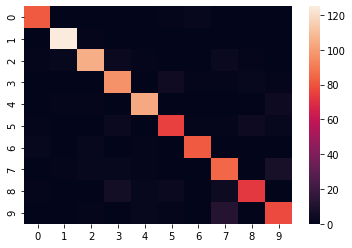

Kernel Used is : poly
accuracy : 0.817
f1 score : 0.8218505123136663


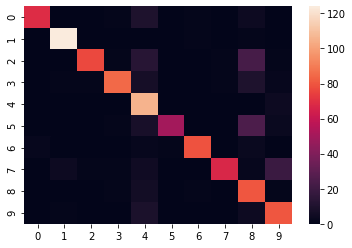

Kernel Used is : sigmoid
accuracy : 0.889
f1 score : 0.8888640276004952


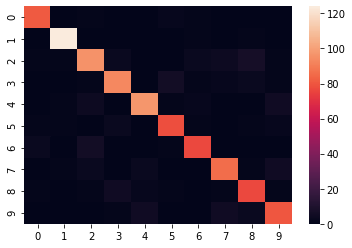

In [13]:
ker = ['linear', 'poly', 'sigmoid']
for k in ker:
    print('Kernel Used is : {a}'.format(a=k))
    clf = make_pipeline(StandardScaler(), SVC(kernel=k))
    clf.fit(images_train, labels_train)
    predicted = clf.predict(images_test)
    print('accuracy : {a}'.format(a=accuracy_score(labels_test, predicted)))
    print('f1 score : {a}'.format(a = f1_score(labels_test, predicted, average='weighted')))
    sns.heatmap(confusion_matrix(labels_test, predicted))
    plt.show()